In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Loading the MNIST Dataset
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [3]:
#Splitting the dataset into testing and training datasets
train_ds, val_ds = random_split(dataset, [50000, 10000])

In [4]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [5]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [6]:
# Flattening the 28x28 images from the MNIST dataset
input_size = 28*28
# The MNIST dataset contains 10 classes of differect objects
num_classes = 10

In [7]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [8]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [9]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3011937141418457, 'val_acc': 0.08573971688747406}

In [10]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9358, val_acc: 0.6243
Epoch [1], val_loss: 1.6681, val_acc: 0.7321
Epoch [2], val_loss: 1.4686, val_acc: 0.7673
Epoch [3], val_loss: 1.3183, val_acc: 0.7842
Epoch [4], val_loss: 1.2029, val_acc: 0.7994


In [11]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1121, val_acc: 0.8075
Epoch [1], val_loss: 1.0394, val_acc: 0.8141
Epoch [2], val_loss: 0.9798, val_acc: 0.8189
Epoch [3], val_loss: 0.9303, val_acc: 0.8259
Epoch [4], val_loss: 0.8884, val_acc: 0.8290


In [12]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8525, val_acc: 0.8325
Epoch [1], val_loss: 0.8214, val_acc: 0.8360
Epoch [2], val_loss: 0.7941, val_acc: 0.8387
Epoch [3], val_loss: 0.7700, val_acc: 0.8418
Epoch [4], val_loss: 0.7486, val_acc: 0.8445


In [13]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7293, val_acc: 0.8455
Epoch [1], val_loss: 0.7120, val_acc: 0.8479
Epoch [2], val_loss: 0.6962, val_acc: 0.8496
Epoch [3], val_loss: 0.6818, val_acc: 0.8520
Epoch [4], val_loss: 0.6686, val_acc: 0.8533


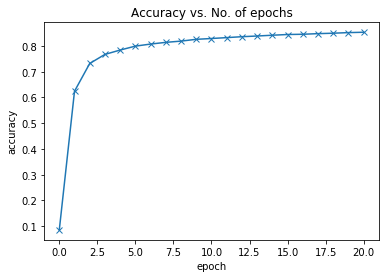

In [14]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');